# Finding Heavy Traffic Indicators on I-94

Interstate 94 (I-94) is an east-west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. It lies along the primary overland route from Seattle to Toronto, and is the only east-west Interstate highway to have a direct connection to Canada.

## Project and Data Overview

Our goal is to analyze I-94 traffic data made available by *John Hogue*, then determine a few idicators of heavy traffic. We'll explore the associations between different columns in the dataset and create some visualizations. We can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

<img src="https://s3.amazonaws.com/dq-content/524/i94_figma.png"/>

*Source*: [DATAQUEST](https://www.dataquest.io/)

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. The station only records cars moving from east to west. Hence **our results are limited to the westbound traffic in the proximity of that station**. They are not applicable to the entire I-94 highway.

Here is the description of the columns in the dataset:
* `holiday`: US National holidays plus regional holiday, Minnesota State Fair
* `temp`: Average temp in kelvin
* `rain_1h`: Amount in mm of rain that occurred in the hour
* `snow_1h`: Amount in mm of snow that occurred in the hour
* `clouds_all`: Percentage of cloud cover
* `weather_main`: Short textual description of the current weather
* `weather_description`: Longer textual description of the current weather
* `date_time`: Hour of the data collected in local CST time
* `traffic_volume`: Hourly I-94 ATR 301 reported westbound traffic volume

## Summary of Findings

Many circumstances can lead to long queues on road, which explains why traffic has become a frequent sighting. We found that DateTime indicators are more important than weather indicators when considering westbound traffic on I-94. There are rush hours that commuters will want to avoid during workdays, and weekend travellers would benefit from knowing that there is a tendency for traffic to build up on Friday evenings before the calm observed at weekends.

Before we commence our analysis, let's import some helpful libraries for working with the data and visulaizations.

## Importing Libraries

In [1]:
# Ignore future warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now that we have imported the required libraries, next we'll read in `Metro_Interstate_Traffic_Volume.csv` dataset using Pandas.

## Exploring the Dataset

In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

The dataset is loaded, let's examine the first and the last five rows of the data and we'll also find information about our data using `DataFrame.info()` method.

In [3]:
# First five rows
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# Last five rows
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
# Information about the dataset
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Initial Notes

* The traffic dataset contains **48,204 rows** and **9 columns**. No columns have null values.
* We have traffic information from 2012-10-02 at 9am to 2018-09-30 at 11pm (roughly 6 years and 11 months of data).
* Numeric columns such as `temp`, `rain_1h`, `snow_1h`, and `clouds_all` do not have specified units of measurement. However, we have this information in our dataset description.
* The `date_time` column is stored as a string/object type rather than the DateTime type. Other columns are assigned the correct data types.
* All columns follow the Python snake case naming convention.

Let's fix the `date_time` column by converting its contents into Pandas Datetime objects.

In [6]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

## Analyzing Traffic Volume

To get a general overview of westbound traffic between Minneapolis and St Paul, we can plot a histogram to visualize the `traffic_volume` column. To understand this distribution in detail, we'll also compute some descriptive statistics using the `describe()` method.

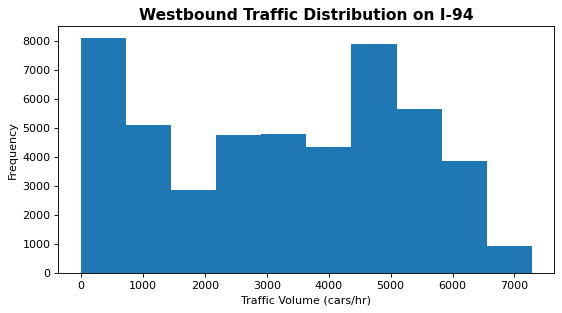

In [7]:
# Plot histogram of 'traffic_volume'
plt.figure(figsize=(8,4), dpi=80)
plt.hist(metro['traffic_volume'])
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Frequency')
plt.title('Westbound Traffic Distribution on I-94', fontsize=14, fontweight='bold')

plt.show()

In [8]:
# Finding statistical summary of 'traffic_volume'
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Observations

* Traffic volume around the station does not present with a skewed, uniform nor normal distribution. Infact, the distribution looks bimodal.
* Hourly traffic volume varies between 0 to 7,280 cars per hour, averaging around 3,260 cars/hr. The mean (3,259) and median (3,380) values of the traffic distribution are also very close.
* At the lower end of the distribution, traffic volumes between 0-500 cars/hr are very common, while at the higher end 4,500-5,000 cars are commonly seen on the road per hour. It is uncommon for traffic volumes to reach over 6,500 cars/hr.
* 25% of the time, traffic volume is under 1,193 cars per hour. For the most part about 75% of the time, there are lesser than 4,933 cars passing through the station every hour. Occassionally, 25% of the time, heavy traffic may occur, with the station recording over 4,933 cars/hr.

The bimodal nature of our histogram creates an interesting question to explore. Considering that there could be less action at nighttime than at day when people are usually active, could there be a time variable explanation for the two peaks that appeared on our histogram (each representing daytime and nightime activity)? We'll explore this possibility by comparing nighttime to daytime data.

## Traffic Volumes: Day vs Night

We'll start by dividing the dataset into two parts:
- Daytime data: hours from 7am to 7pm (12 hours)
- Nighttime data: hours from 7pm to 7am (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [9]:
# Separate the day and night time
day = metro[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
night = metro[(metro['date_time'].dt.hour < 7) | (metro['date_time'].dt.hour >= 19)]

print(f'Our daytime data has: {day.shape[0]:,} rows and {day.shape[1]} columns')
print(f'Our nighttime data has: {night.shape[0]:,} rows and {night.shape[1]} columns')

Our daytime data has: 23,877 rows and 9 columns
Our nighttime data has: 24,327 rows and 9 columns


Now that we have extracted our daytime and nighttime data, let's visualize and compare their respective traffic distributions using a histogram. We'll examine their descriptive statistics too.

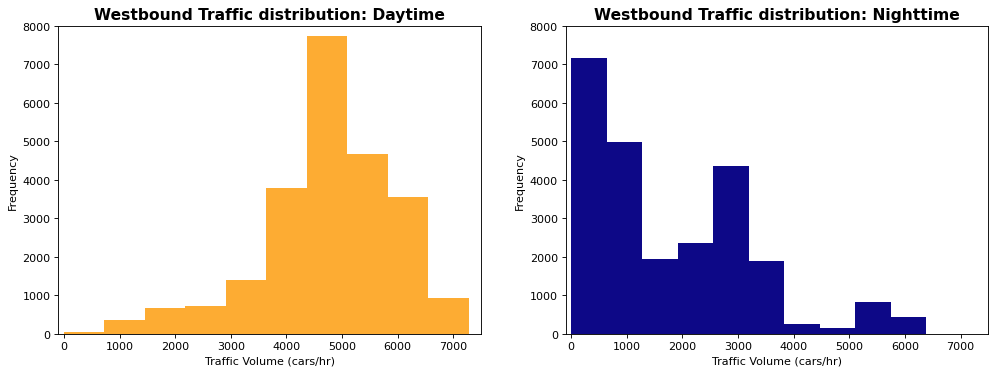

In [10]:
# Histogram distribution of day and night traffic volume
plt.figure(figsize=(15,5), dpi=80)

# Visualize daytime
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'], color='#fdac33')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Frequency')
plt.title('Westbound Traffic distribution: Daytime', fontsize=14, fontweight='bold')
# set axes limites for easy comparision
plt.xlim([-100,7500])
plt.ylim([0,8000])

# Visualize nighttime
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'], color='#0d0887')
plt.xlabel('Traffic Volume (cars/hr)')
plt.ylabel('Frequency')
plt.title('Westbound Traffic distribution: Nighttime', fontsize=14, fontweight='bold')
# set axes limites
plt.xlim([-100,7500])
plt.ylim([0,8000])

plt.show()

In [11]:
# Descriptive statistics of day and night and view the merged results
pd.merge(day['traffic_volume'].describe(), night['traffic_volume'].describe(),
         left_index=True, right_index=True, suffixes=('_day', '_night'))

,traffic_volume_day,traffic_volume_night
count,23877.000000,24327.000000
mean,4762.047452,1785.377441
std,1174.546482,1441.951197
min,0.000000,0.000000
25%,4252.000000,530.000000
50%,4820.000000,1287.000000
75%,5559.000000,2819.000000
max,7280.000000,6386.000000


### Observations

**Daytime Traffic:**
* Distribution is left-skewed. Higher traffic volumes are much more common and the incidence of fewer traffic are very rare. The bulk of traffic lies in the range of 4,000 to 65,000 cars/hr.

**Nighttime Traffic:**
* Nighttime data shows a right-skewed, indicating an opposite pattern to daytime trends. At night, higher traffic volumes are less common. Infact, a considerable proportion of nighttime traffic lies between 0 to 3,000 vehicles per hour, much lesser than what was observed at daytime.

**Descriptive statistics of Daytime vs. Nighttime data also bolsters our claims**
* Mean nighttime traffic is 1,785 cars/hr; far lower than the mean daytime traffic of 4,762 cars/hr.
* 75% of daytime traffic occurs in the range of 4,252 - 7,280 cars/hr.
* 75% of the time, nighttime traffic was lesser than 2,819 cars/hr.

Considering that our goal to analyze the heavy traffic indicators, daytime data would be best suited for our analysis. We'll focus on daytime traffic at first, then explore nighttime traffic afterwards.

## Time Indicators

One of the possible indicators of heavy traffic is time. It is possible to find more people on the road in a certain month, on a certain day, or at a certain time of the day. We are going to use line plots to explore how westbound traffic on I-94 has evolved, according to the following parameters:

- Month of the year
- Day of the week
- Hour of the day

### Daytime Traffic by Month

The fastest way to get the average traffic volume for each month is by using the `DataFrame.groupby()` method. In the code below, we'll do the following:

- Use `day['date_time'].dt.month` to create a new column where each value describes the month when the traffic volume measurement was taken.
- Use `day.groupby('month').mean()` to group the dataset by the `month` column with mean as an aggregate function.

Before moving on it is worth mentioning that our analysis will involve a lot of repetitive tasks. Hence, to ensure an efficient workflow, we'll automate some of these processes by creating functions `group_column()` and `create_line()` that can execute defined aggregations, and draw line plot from given arguments. The code cell below shows these two functions.

In [12]:
# Create group columns function
def group_column(df, col, aggr_col):
    """
    Groups DataFrame by col then aggregates by mean of aggr_col.
        Params:
            df (DataFrame): DataFrame of interest
            col (str): Name of column to group by
            aggr_col (str): Name of the column to aggregate
    """
    result = df.groupby(col)[aggr_col].mean().reset_index()
    return result

# Create function for line plot
def create_line(df, x_val, y_val, label_x, label_y, title, line_color='#003a6d', xtype=None,
                x_limit=None, y_limit=None, ticks_x=None):
    """
    Creates lineplot from given arguments.
        Params:
            df (DataFrame): DataFrame of interest
            x_val (str): Value on the x-axis
            y_val (str): Value on the y-axis
            label_x (str): Label on the x-axis
            label_y (str): Label on the y-axis
            title (str): Title on the graph
            line_color (str): Trendline color
            xtype (str): Type of data on the x axis ('day', 'month', 'year', 'day_of_week', 'day_hour', 'night_hour')
            x_limit (list): Limit of x-axis in format ([startpoint, endpoint])
            y_limit (list): Limit of y-axis in format ([startpoint, endpoint])
            ticks_x: (tuple, list): Details of x-axis ticks in format ([startpoint, ..., endpoint])
            
        Returns:
            Lineplot with specified parameters
    """
    
    plt.plot(df[x_val], df[y_val], color=line_color, linewidth=3)
    plt.xlabel(label_x, labelpad=10)
    plt.ylabel(label_y, labelpad=10)
    plt.title(title, fontweight='bold', fontsize=14, pad=20, loc='center')
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # set x-axis ticks based on xtype value
    if xtype:
        if xtype.lower()=='month':
            plt.xticks(range(1,13), rotation=30,
                       labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                               'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
        
        elif xtype.lower()=='day_of_week':
            plt.xticks(range(0,7), rotation=30,
                       labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

        elif xtype.lower()=='day_hour':
            plt.xticks(range(7,19))
            
        elif xtype.lower()=='other':
            plt.xticks(ticks_x)
    
    plt.grid()

Now that our functions are created, let's get the monthly traffic volume averages and generate a line plot to visualize how the traffic volume changed each month on average.

In [13]:
# Group columns for aggregation
day['month'] = day['date_time'].dt.month
by_month = group_column(df=day, col='month', aggr_col='traffic_volume')
by_month

,month,traffic_volume
0,1,4495.613727
1,2,4711.198394
2,3,4889.409560
3,4,4906.894305
4,5,4911.121609
5,6,4898.019566
6,7,4595.035744
7,8,4928.302035
8,9,4870.783145
9,10,4921.234922


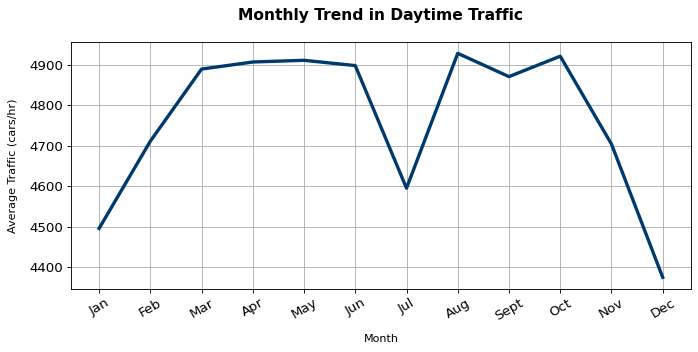

In [14]:
# Create line plot
plt.figure(figsize=(10,4), dpi=80)
create_line(df=by_month, x_val='month', y_val='traffic_volume',
            label_x='Month', label_y='Average Traffic (cars/hr)',
            title='Monthly Trend in Daytime Traffic', xtype='month')

plt.show()

### Observations

- Traffic volumes vary between 4,000 and 5,000 cars per hour every month. August and October are noticeably the months with the highest traffic acitivity.
- Traffic is steadily high from March to June, while January, Februray, November and December record lower traffic volumes.
- Our observations would have led us to assume that traffic volumes are generally higher at warmer periods than in the colder seasons (December, January, and Februray). However, the notable traffic decrease in July affects our ability to conclude.

One could propose that the decreased traffic volume in July is attributed to the summer holidays around that period. However, June and August are also summer holiday months, and they do not seem to be affected by the trend. This suggests another probable cause. Let's explore our data for more insights. A good place to start is to check how traffic volumes have evolved over the years in July.

In [15]:
# Extract years from date_time and assign to new column 'year'
day['year'] = day['date_time'].dt.year

# Extract only the month of july
july_data = day[day['month'] == 7]

# Groupby july data with each year and calculate
# the average traffic volume in month of july
by_july = group_column(df=july_data, col='year', aggr_col='traffic_volume')
by_july

,year,traffic_volume
0,2013,4914.354054
1,2014,4871.598240
2,2015,4613.146226
3,2016,3924.923645
4,2017,4734.120301
5,2018,4586.899543


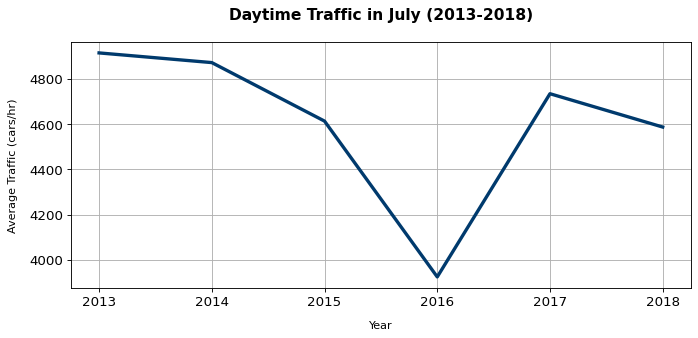

In [16]:
# Visualize traffic volume in july over the years from 2013 to 2018
plt.figure(figsize=(10,4), dpi=80)
create_line(df=by_july, x_val='year', y_val='traffic_volume',
            label_x='Year', label_y='Average Traffic (cars/hr)',
            title='Daytime Traffic in July (2013-2018)')
plt.show()

### Observation

- On average, the traffic volume in July ranges from around 4,600 to 4,800 cars per hour (similar to other summer months). However, there was a significant decrease (below 4,000 cars) in July, 2016.

This occurrence might explain the low average we previously observed for July. Could a particular event have happened in 2016 to affect traffic volumes? Let's explore daytime traffic over all the months in 2016.

In [17]:
# Extract year 2016 daytime data
traffic_2016 = day[day['year'] == 2016]

# Find average traffic of year 2016 each month
by_monthly_traffic_2016 = group_column(df=traffic_2016, col='month', aggr_col='traffic_volume')
by_monthly_traffic_2016

,month,traffic_volume
0,1,4621.393443
1,2,4859.087248
2,3,5020.902439
3,4,5195.758065
4,5,4839.603604
5,6,5011.217158
6,7,3924.923645
7,8,4595.299505
8,9,4665.110236
9,10,4583.941828


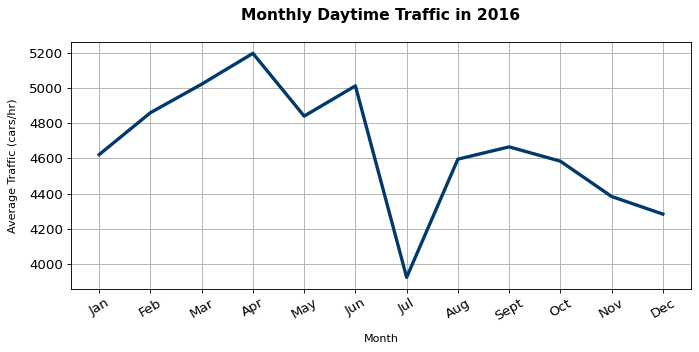

In [18]:
# Visualize monthly traffic volume in 2016
plt.figure(figsize=(10,4), dpi=80)
create_line(df=by_monthly_traffic_2016, x_val='month', y_val='traffic_volume',
            label_x='Month', label_y='Average Traffic (cars/hr)',
            title='Monthly Daytime Traffic in 2016', xtype='month')
plt.show()

### Observation
- Average Daytime traffic was generally above 4,000 cars/hr except in July where traffic volumes dipped even below the winter months (December, January, and February)

July 2016 looks undoubtedly interesting. Something significant must have happened to cause this drop in traffic activity. Next, let's explore traffic activity over all the days in july 2016.

In [19]:
# Extract number of days of 2016 and assign them to new column 'day'
traffic_2016['day'] = traffic_2016['date_time'].dt.day

# Extract July data from 'traffic_2016'
july_2016 = traffic_2016[traffic_2016['month'] == 7]

# Calculate number of weeks in July and assign them to new column 'week'
july_2016['week'] = (july_2016['date_time'].dt.week - 26) + 1

# Find average traffic volume based on each day of the week
by_july_traffic_2016 = july_2016.groupby(['day', 'week']).mean().reset_index()

# Extract each distinct week from July 2016
wk_1 = by_july_traffic_2016.query('week == 1')
wk_2 = by_july_traffic_2016.query('week == 2')
wk_3 = by_july_traffic_2016.query('week == 3')
wk_4 = by_july_traffic_2016.query('week == 4')
wk_5 = by_july_traffic_2016.query('week == 5')

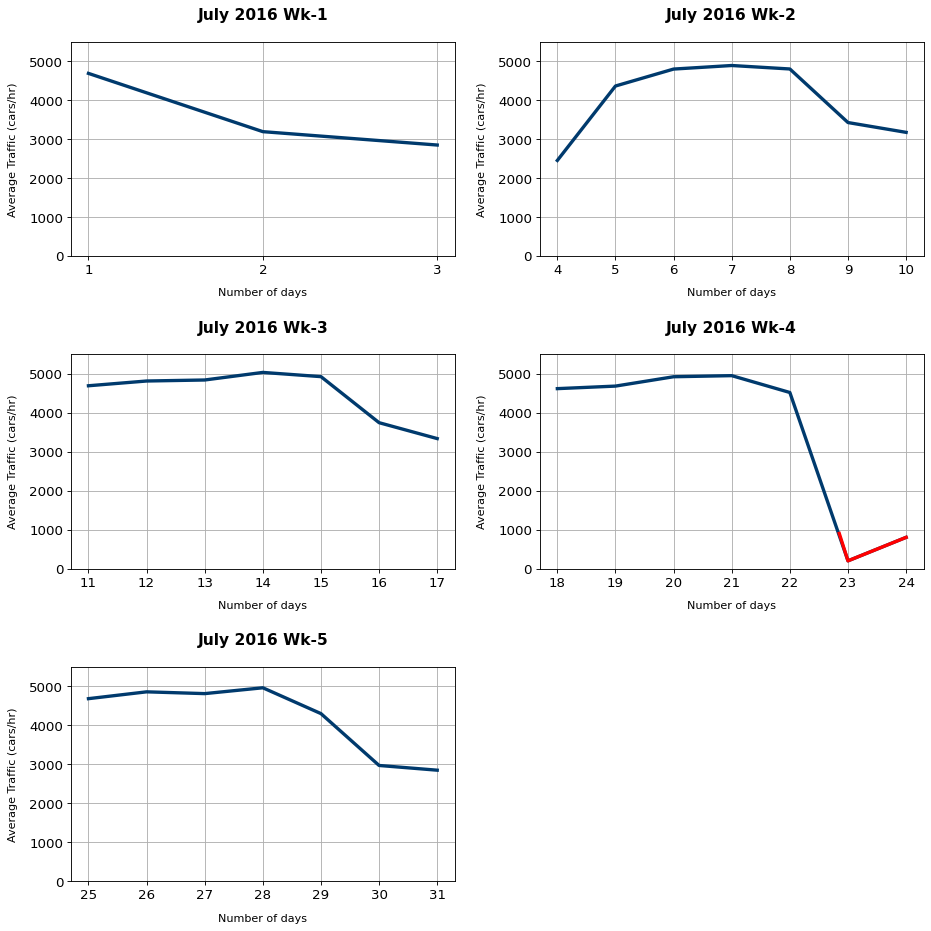

In [20]:
# Draw line plot from week-1 to week-5
plt.figure(figsize=(12,12), dpi=80)

plt.subplot(3,2,1)
create_line(df=wk_1, x_val='day', y_val='traffic_volume',
            label_x='Number of days', label_y='Average Traffic (cars/hr)',
            title='July 2016 Wk-1', xtype='other', y_limit=[0,5500], ticks_x=range(1,4)) # set range according to num of days in the week

plt.subplot(3,2,2)
create_line(df=wk_2, x_val='day', y_val='traffic_volume',
            label_x='Number of days', label_y='Average Traffic (cars/hr)',
            title='July 2016 Wk-2', xtype='other', y_limit=[0,5500], ticks_x=range(4,11))

plt.subplot(3,2,3)
create_line(df=wk_3, x_val='day', y_val='traffic_volume',
            label_x='Number of days', label_y='Average Traffic (cars/hr)',
            title='July 2016 Wk-3', xtype='other', y_limit=[0,5500], ticks_x=range(11,18))

plt.subplot(3,2,4)
create_line(df=wk_4, x_val='day', y_val='traffic_volume',
            label_x='Number of days', label_y='Average Traffic (cars/hr)',
            title='July 2016 Wk-4', xtype='other', y_limit=[0,5500], ticks_x=range(18,25))
# Emphasize the low traffic activity on July 23 and 24
plt.plot([22.85, 23, 24], [900, 197, 800], color='r', linewidth=3)

plt.subplot(3,2,5)
create_line(df=wk_5, x_val='day', y_val='traffic_volume',
            label_x='Number of days', label_y='Average Traffic (cars/hr)',
            title='July 2016 Wk-5', xtype='other', y_limit=[0,5500], ticks_x=range(25,32))

# Adjust spacing between plots
plt.tight_layout(pad=2.0)
plt.show()

### Observation

- Something unusual happened on the 23rd and 24th of July 2016 where traffic volumes plunged lesser than 1,000 cars per hour. There could have between a road construction at the time, a conflict, or an accident, which could have significantly reduced traffic avtivity.

A quick search of 23rd and 24th July 2016 with the keywords I-94 construction will yeild some favourable results. It appears that road construction acitivities took place on the interstate road around that period. We can find more information about this construction work at the [Department of transportation 2016 weekly updates](https://www.dot.state.mn.us/d4/projects/alexi94hwy29/weekly.html) and [The cran's detroit business page.](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696)

### Weekday and Daytime Traffic

Earlier, we generated a line plot to explore how traffic volume changed each month on average. We'll now continue by building line plots for another time unit; the day of the week.

To get the traffic volume averages for each day of the week, we'll use the handy Pandas Series method `dt.dayofweek()` to extract the day of the week from the `date_time` column. The resulting values will be a range of possible weekdays from `Monday: 0` to `Sunday: 6`.

In [21]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = group_column(df=day, col='dayofweek', aggr_col='traffic_volume')
by_dayofweek

,dayofweek,traffic_volume
0,0,4893.551286
1,1,5189.004782
2,2,5284.454282
3,3,5311.303730
4,4,5291.600829
5,5,3927.249558
6,6,3436.541789


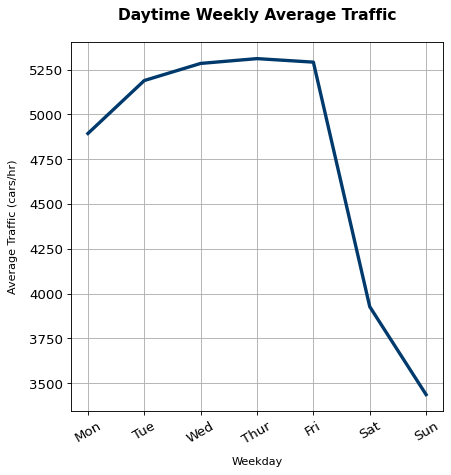

In [22]:
plt.figure(figsize=(6,6), dpi=80)
create_line(df=by_dayofweek, x_val='dayofweek', y_val='traffic_volume',
            xtype='day_of_week', label_x='Weekday', label_y='Average Traffic (cars/hr)',
            title='Daytime Weekly Average Traffic')

plt.show()

### Observation

- Traffic is generally higher on working days (Mondays to Fridays), with average traffic volumes around 5,000 cars/hr. Weekends (Saturday and Sunday) show lower traffic acitivity (less than 4,000 cars/hr).

The higher traffic acitivity on working days may be due to people leaving their homes for work or returning. To investigate this idea, we could check the exact periods of the day when higher traffic volumes are recorded. If our assumption is correct, we should observe particular spikes in traffic acitivity during rush hours when people are expected to go to work or returning home.

### Daytime Traffic and Hour of Day

We'll try to generate a line plot for the time of day. The weekends, however, will pull down the average values, since they generally record less traffic activity. To prevent this from happening, we'll visualize the averages separately.

We'll start by splitting the data based on the day type; business day or weekend.

In [23]:
day['hour'] = day['date_time'].dt.hour

# Extract weekdays and weekends
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

# Group 'hour' of weekdays and weekends to find average traffic
by_hour_business_days = group_column(df=business_days, col='hour', aggr_col='traffic_volume')
by_hour_weekend = group_column(df=weekend, col='hour', aggr_col='traffic_volume')

print(f'Business days:\n{by_hour_business_days}')
print()
print(f'Weekends:\n{by_hour_weekend}')

Business days:
    hour  traffic_volume
0      7     6030.413559
1      8     5503.497970
2      9     4895.269257
3     10     4378.419118
4     11     4633.419470
5     12     4855.382143
6     13     4859.180473
7     14     5152.995778
8     15     5592.897768
9     16     6189.473647
10    17     5784.827133
11    18     4434.209431

Weekends:
    hour  traffic_volume
0      7     1589.365894
1      8     2338.578073
2      9     3111.623917
3     10     3686.632302
4     11     4044.154955
5     12     4372.482883
6     13     4362.296564
7     14     4358.543796
8     15     4342.456881
9     16     4339.693805
10    17     4151.919929
11    18     3811.792279


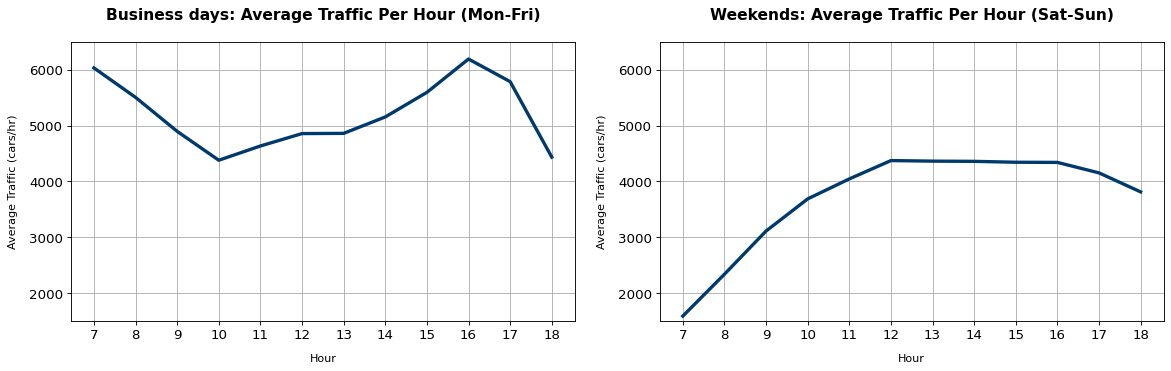

In [24]:
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,2,1)
create_line(df=by_hour_business_days, x_val='hour', y_val='traffic_volume',
            label_x='Hour', label_y='Average Traffic (cars/hr)',
            title='Business days: Average Traffic Per Hour (Mon-Fri)', xtype='day_hour', y_limit=[1500, 6500])

plt.subplot(1,2,2)
create_line(df=by_hour_weekend, x_val='hour', y_val='traffic_volume',
            label_x='Hour', label_y='Average Traffic (cars/hr)',
            title='Weekends: Average Traffic Per Hour (Sat-Sun)', xtype='day_hour', y_limit=[1500, 6500])


plt.tight_layout(pad=2.0)
plt.show()

### Observations

- Our business days graph has two peaks corresponding to 7am and 4pm (both recording over 6,000 cars/hr). This implies that the expected rush hours are 7am when most people leave for work and 4pm when people start to head back home.
- The weekend shows a notably different pattern. Traffic volumes are lower compared to the weekdays. There is no increase in traffic activity at 7am. There is a tendency for people to sleep or rest in their homes after the long weeks of work.
- Mild traffic bulids up on weekend afternoons between 12pm and 4pm (around 4,500 cars/hr). This is understandable, considering that the period corresponds to weekend leisure hours.

### Findings from Time Data Analysis of Daytime Traffic

- The traffic is usually heavier during warm months (March-October) compared to cold months (November-Februray).
- A construction activity took place on I-94 between 23rd and 24th July 2016. During this period, road activity was minimal.
- The road is busier on business days than weekends.
- On business days, rush hours are 7am and 4pm. They are generally busier than other hours.

## Weather Indicators

Another possible indicator of heavy traffic is weather. Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

- **Numerical columns:** `temp`, `rain_1h`, `snow_1h` and `clouds_all`.
- **Categorical columns:** `weather_main` and `weather_description`.

### Numerical Weather Indicators

Let's start by examining the correlation of numerical columns with traffic volume. We'll use the `DataFrame.corr()` method.

In [25]:
day[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.010815,-0.019286,-0.135519,0.128317
rain_1h,0.010815,1.000000,-0.000091,0.004993,0.003697
snow_1h,-0.019286,-0.000091,1.000000,0.027721,0.001265
clouds_all,-0.135519,0.004993,0.027721,1.000000,-0.032932
traffic_volume,0.128317,0.003697,0.001265,-0.032932,1.000000


Only `temp` shows some degree of correlation with traffic volume (approximately 0.13). This correlation is very minimal and we'll attempt to demonstrate it visually using a scatterplot.

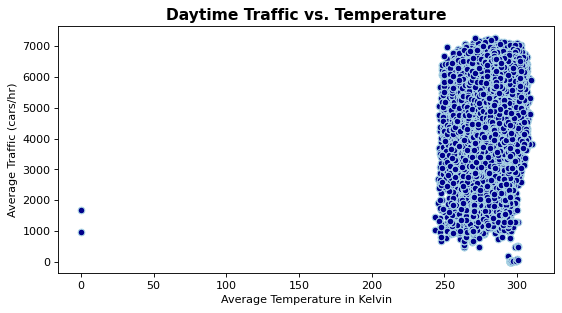

In [26]:
plt.figure(figsize=(8,4), dpi=80)
plt.scatter(day['temp'], day['traffic_volume'], c='darkblue', edgecolors='lightblue')
plt.xlabel('Average Temperature in Kelvin')
plt.ylabel('Average Traffic (cars/hr)')
plt.title('Daytime Traffic vs. Temperature', fontsize=14, fontweight='bold')

plt.show()

We have two points on the scatterplot with zero temperature. This is quite unusual. We'll plot the graph again, ignoring the zero temperature. Let's set our x-axis limit to a range that is more representative of our data.

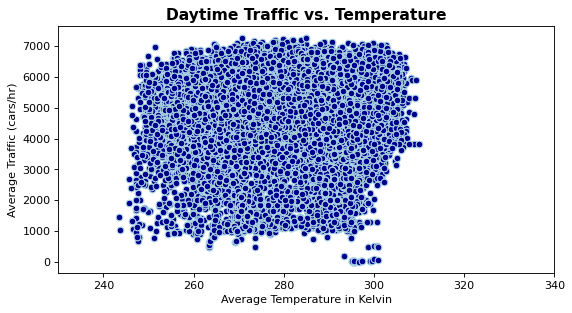

In [27]:
plt.figure(figsize=(8,4), dpi=80)
plt.scatter(day['temp'], day['traffic_volume'], c='darkblue', edgecolors='lightblue')
plt.xlabel('Average Temperature in Kelvin')
plt.ylabel('Average Traffic (cars/hr)')
plt.title('Daytime Traffic vs. Temperature', fontsize=14, fontweight='bold')
plt.xlim([230, 340])

plt.show()

It appears that there isn't a strong correlation to conclude anything useful about temperature and traffic volume. Let's turn our attention to the categorical columns: `weather_main` and `weather_description`.

### Categorical Weather Indicators

We'll calculate the average traffic volume associated with each unique weather type and weather description, then visualize our findings.

In [28]:
# Calculate average traffic in 'weather_main' and 'weather_description'
by_weather_main = group_column(df=day, col='weather_main', aggr_col='traffic_volume')
by_weather_description = group_column(df=day, col='weather_description', aggr_col='traffic_volume')

To avoid repetitive tasks, we'll define `create_barh()` function that creates horizontal bar graph. 

In [29]:
def create_barh(df, x_val, y_val, label_x=None, label_y=None, title=None, size=None):
    """
    Creates horizontal bar graph from given x_val and y_val.
        Params:
            df (DataFrame): DataFrame containing columns of interest
            x_val (str): Column for categorical variable
            y_val (str): Column for numerical variable
            label_x (str): Label description on the x-axis
            label_y (str): Label description on the y-axis
            title (str): Graph title
            size (tuple): Figure size (width, height)
    """
    bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in df[y_val]]
    df.plot.barh(x_val, y_val, legend=None, color=bar_color, figsize=size)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title, pad=14, fontweight='bold')
    plt.axvline(x=0, color='#333', linestyle='-', linewidth=2)
    plt.axvline(x=5000, color='#444', linestyle='--', linewidth=1, alpha=0.3)

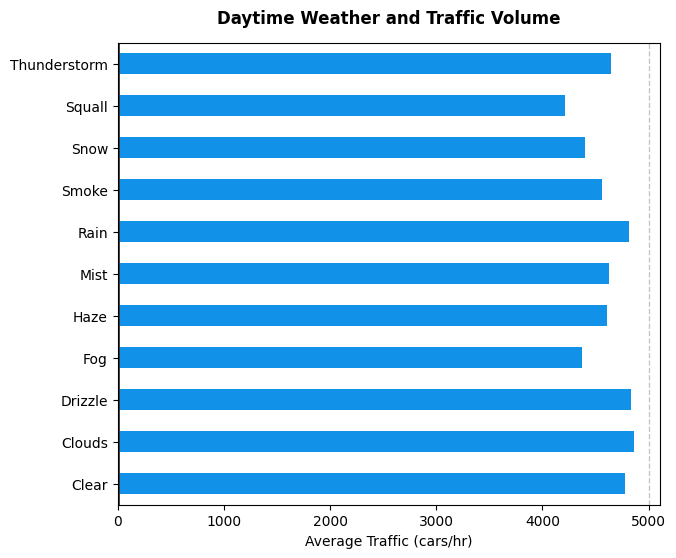

In [30]:
create_barh(df=by_weather_main, x_val='weather_main', y_val='traffic_volume',
            label_x='Average Traffic (cars/hr)', title='Daytime Weather and Traffic Volume',
            size=(7,6))
plt.show()

### Observations

- For time indicators, we considered heavy traffic over 5,000 cars/hr on average. No weather category seems to cause traffic that exceeds the 5,000 mark.
- On cloudy, drizzly, rainy and clear days, traffic approaches nearly 5,000 cars/hr. However, there is still not enough evidence to conclude the relationship between weather types and heavy traffic.

Let's explore the more detailed `weather_description` column to see if we can draw some additional insights.

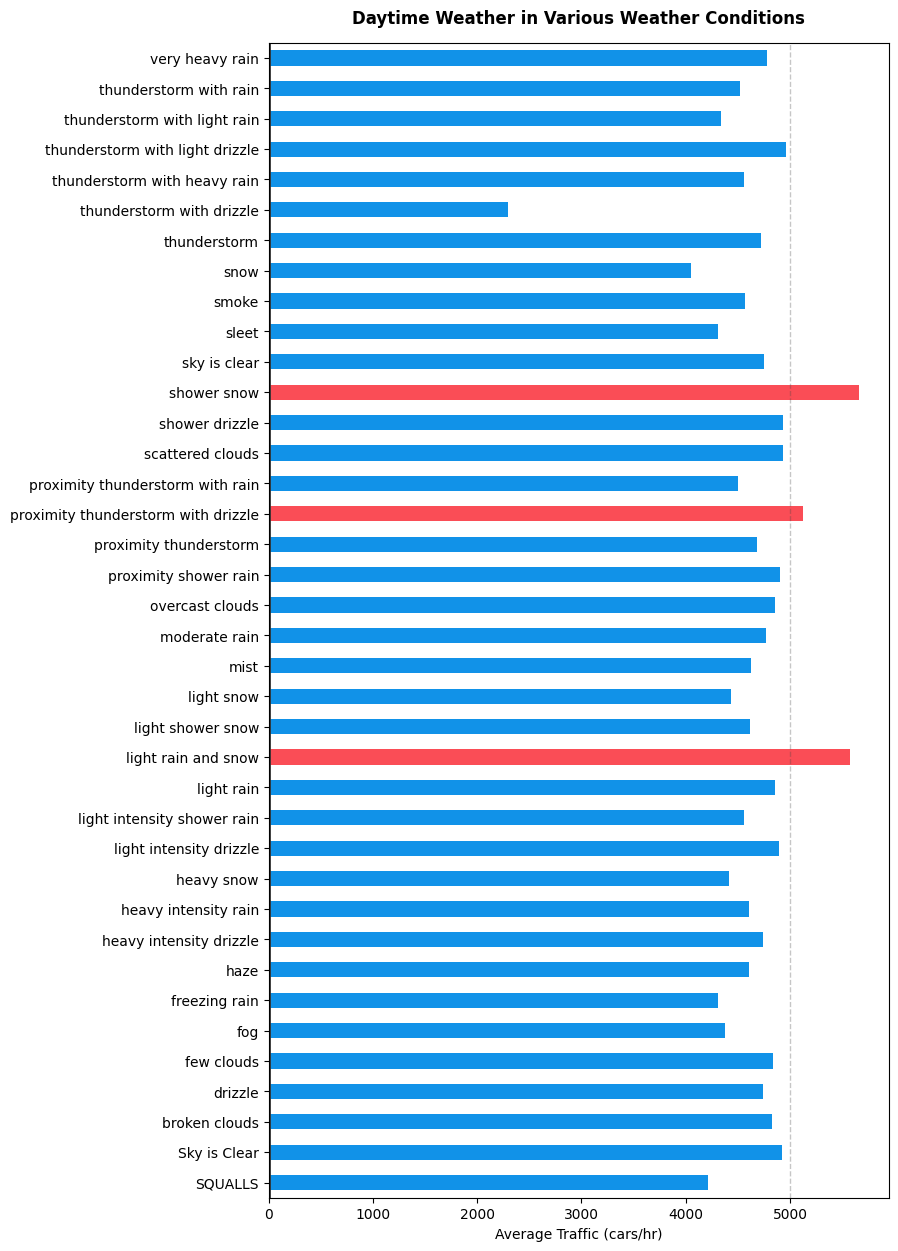

In [31]:
create_barh(df=by_weather_description, x_val='weather_description', y_val='traffic_volume',
            label_x='Average Traffic (cars/hr)', title='Daytime Weather in Various Weather Conditions',
            size=(8,15))
plt.show()

### Observations

- There are three weather conditions where traffic volume exceeds 5,000 cars:
    - Shower snow
    - Proximity thunderstorm with drizzles
    - Light rain and snow
- These situations point to bad weather. In bad weather, people may prefer to commute through cars for safety reasons, rather than using alternatives like bikes or long walks. On careful inspection, we can see some other extreme days where people did not exhibit similar behaviours (for example, during thunderstorms with heavy rain). This makes it hard to conclude the underlying reasons for sure.

Next, we'll turn our attention to some possible traffic indicators at Nighttime.

## Traffic Indicators at Nighttime

### Nighttime Traffic by Month

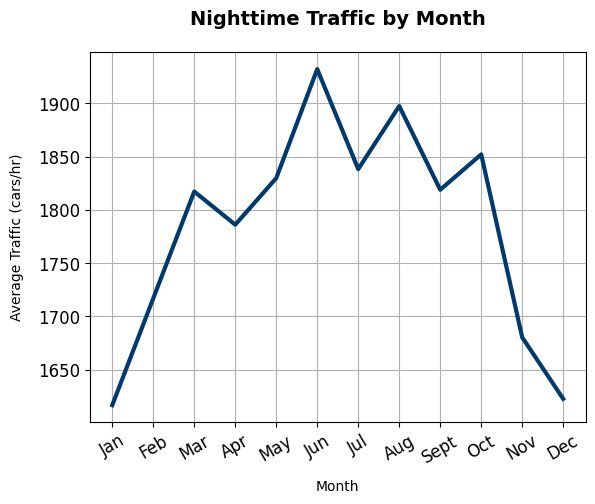

In [32]:
night['month'] = night['date_time'].dt.month
by_nighttime_month = group_column(df=night, col='month', aggr_col='traffic_volume')

create_line(df=by_nighttime_month, x_val='month', y_val='traffic_volume',
            label_x='Month', label_y='Average Traffic (cars/hr)', title='Nighttime Traffic by Month',
            xtype='month')
plt.show()

### Observation

- The highest nighttime traffic occurs in June, July, and August (the summer months). Summer months are generally known to have longer days, encouraging people to stay out longer and return home late, hence the relatively busier roads at night.

### Weekday and Nighttime Traffic

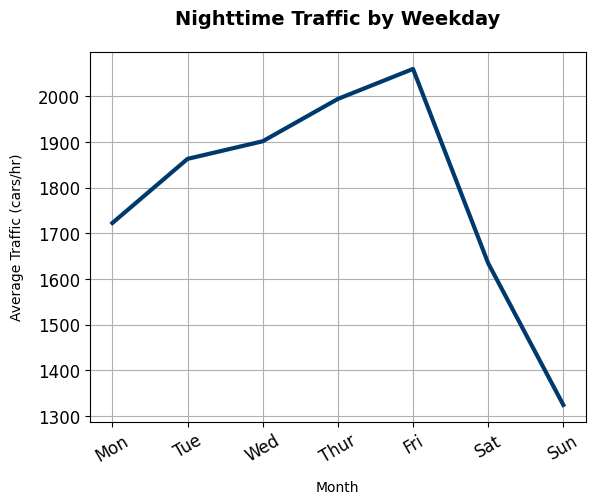

In [33]:
night['dayofweek'] = night['date_time'].dt.dayofweek
by_weekday_traffic_nighttime = group_column(df=night, col='dayofweek',
                                            aggr_col='traffic_volume')

create_line(df=by_weekday_traffic_nighttime, x_val='dayofweek', y_val='traffic_volume',
            label_x='Month', label_y='Average Traffic (cars/hr)', title='Nighttime Traffic by Weekday',
            xtype='day_of_week')
plt.show()

### Observation

- Traffic is highest on Friday nights and minimal during weekends. This might be due to the tendency of people to enage in leisure activities on Friday evenings, after the long working week. People may decide to go out, visit restaurants or have dinner with their friends and families.

Let's investigate further by exploring nighttime traffic during the working days and weekends. We'll analyse the nighttime in two aspects:

-  `Dusk`: Categorized as nighttime period before 00:00
- `Dawn`: Nighttime periods from 00:00 to 07:00 (inclusive)

**Note:** These categories are mainly assigned for convenience, one may decide to come up with a much better definition of dawn and dusk than the one used in this analysis.

In [34]:
# Add hour and day of week to 'night dataframe' (similar to what we did with 'day dataframe')
night['dayofweek'] = night['date_time'].dt.dayofweek
night['hour'] = night['date_time'].dt.hour

# Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for workdays
workday_dusk = night.query("(hour >= 19) & (dayofweek <= 4)")
workday_dawn = night.query("(hour < 19) & (dayofweek <= 4)")

#Filter dusk (19:00 - 23:00) and dawn (00:00 - 06:00) hours for weekends
weekend_dusk = night.query("(hour >= 19) & (dayofweek > 4)")
weekend_dawn = night.query("(hour < 19) & (dayofweek > 4)")

# Calculate average traffic volume per hour across all groups
workday_dusk_traffic = group_column(df=workday_dusk, col='hour', aggr_col='traffic_volume')
workday_dawn_traffic = group_column(df=workday_dawn, col='hour', aggr_col='traffic_volume')
weekend_dusk_traffic = group_column(df=weekend_dusk, col='hour', aggr_col='traffic_volume')
weekend_dawn_traffic = group_column(df=weekend_dawn, col='hour', aggr_col='traffic_volume')

# List together workday & weekend traffic (with respect to dust & dawn)
dusk_list = [workday_dusk_traffic, weekend_dusk_traffic]
dawn_list = [workday_dawn_traffic, weekend_dawn_traffic]

# Names of legend for visualization
names = ['Friday nights', 'Other nights']

We'll have to define a function `merge_line_plots()` that will create a grid plot and draw `dusk` and `dawn` trendline based on workday and weekend.

In [35]:
def merge_line_plots(df_list, title, x_limit, y_limit=[0,6500],
                     names_list=None, color_list=['#003a6d', '#fa4d56']):
    """
    Creates grid line plots on a shared axes.
        Params:
            df_list (list): list of two DataFrames to make plot from
            title (str): Graph title
            x_limit (list): Limit of x-axes ([startpoint, endpoint])
            y_limit (list): Limit of y-axes ([startpoint, endpoint])
            name_list (list): List of two strings to use a legend names
            color_list (list): List of two colors to use as trendline color
            
        Returns:
            Merged line graph with 'hour' and 'traffic volume' columns plotted from the df_list
    """
    plt.plot(df_list[0]['hour'], df_list[0]['traffic_volume'],
             color=color_list[0], label=names_list[0], linewidth=4)
    plt.plot(df_list[1]['hour'], df_list[1]['traffic_volume'],
             color=color_list[1], label=names_list[1], linewidth=4)
    plt.xlabel('Hour')
    plt.ylabel('Average Traffic (cars/hr)')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlim(x_limit)
    plt.ylim(y_limit)
    plt.xticks(range(x_limit[0], x_limit[1]+1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()

Let's call our function to visualize the trend.

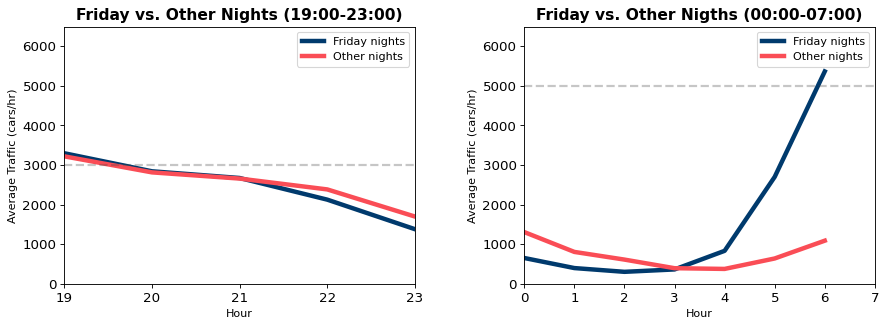

In [36]:
plt.figure(figsize=(12,5), dpi=80)

plt.subplot(1,2,1)
merge_line_plots(df_list=dusk_list, title='Friday vs. Other Nights (19:00-23:00)', x_limit=[19,23], names_list=names)
plt.axhline(y=3000, color='#444', linestyle='--', linewidth=2, alpha=0.3)

plt.subplot(1,2,2)
merge_line_plots(df_list=dawn_list, title='Friday vs. Other Nigths (00:00-07:00)', x_limit=[0,7], names_list=names)
plt.axhline(y=5000, color='#444', linestyle='--', linewidth=2, alpha=0.3)

plt.tight_layout(pad=4.0)
plt.show()

### Observations

- **At Dusk**:
    - Traffic takes longer to cool off on Fridays.
    - Traffic volume remains above 3,000 cars/hr on Fridays until 22:00. On other nights, traffic reduces below 3,000 cars/hr as early as 20:00.
    
- **At Dawn**:
    - Both Friday and other days show increased traffic activity starting from 04:00 to 07:00. This increase for Friday nights might be due to people returning home from late night activities.
    - The relatively reduced traffic activity on other days, at dawn, might be due to some weekend days (Saturdays and Sundays) pulling down the average values of the working days.
    
## Weather Indicators of Nighttime Traffic

### Numerical indicators

In [37]:
# Correlation of numeric columns
night[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.091135,-0.021240,-0.087137,0.094004
rain_1h,0.091135,1.000000,-0.003235,0.079049,-0.012972
snow_1h,-0.021240,-0.003235,1.000000,0.028088,-0.007453
clouds_all,-0.087137,0.079049,0.028088,1.000000,0.012832
traffic_volume,0.094004,-0.012972,-0.007453,0.012832,1.000000


There appears to be no solid correlation between any of the numerical indicators and traffic volume. However, we can attempt to visualize the relationship between `temp` and `traffic_volume` since it appears relatively stronger than the other.

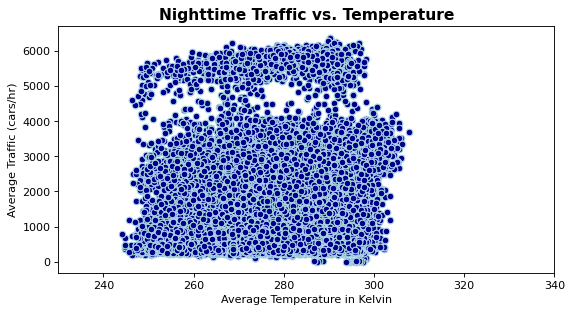

In [38]:
plt.figure(figsize=(8,4), dpi=80)
plt.scatter(night['temp'], night['traffic_volume'], c='darkblue', edgecolors='lightblue')
plt.xlabel('Average Temperature in Kelvin')
plt.ylabel('Average Traffic (cars/hr)')
plt.title('Nighttime Traffic vs. Temperature', fontsize=14, fontweight='bold')
plt.xlim([230, 340])

plt.show()

It's clear that there is no correlation between temperature and nighttime traffic.

### Categorical Weather Indicators

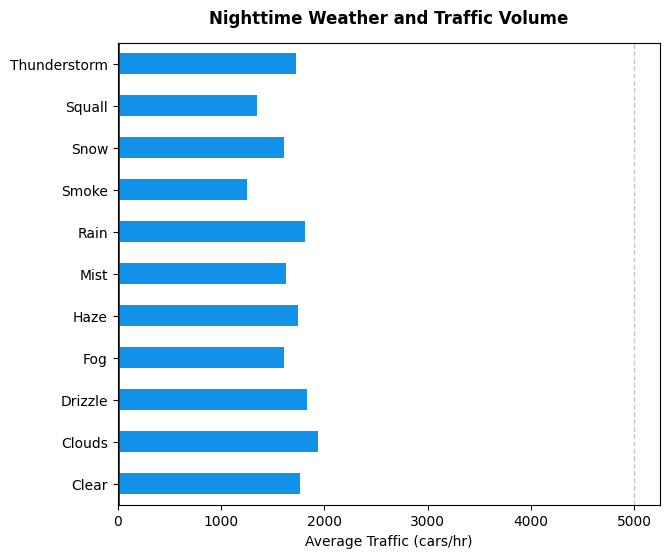

In [39]:
# By night weather main
by_night_weather_main = group_column(df=night, col='weather_main', aggr_col='traffic_volume')
create_barh(df=by_night_weather_main, x_val='weather_main', y_val='traffic_volume',
            label_x='Average Traffic (cars/hr)', title='Nighttime Weather and Traffic Volume',
            size=(7,6))
plt.show()

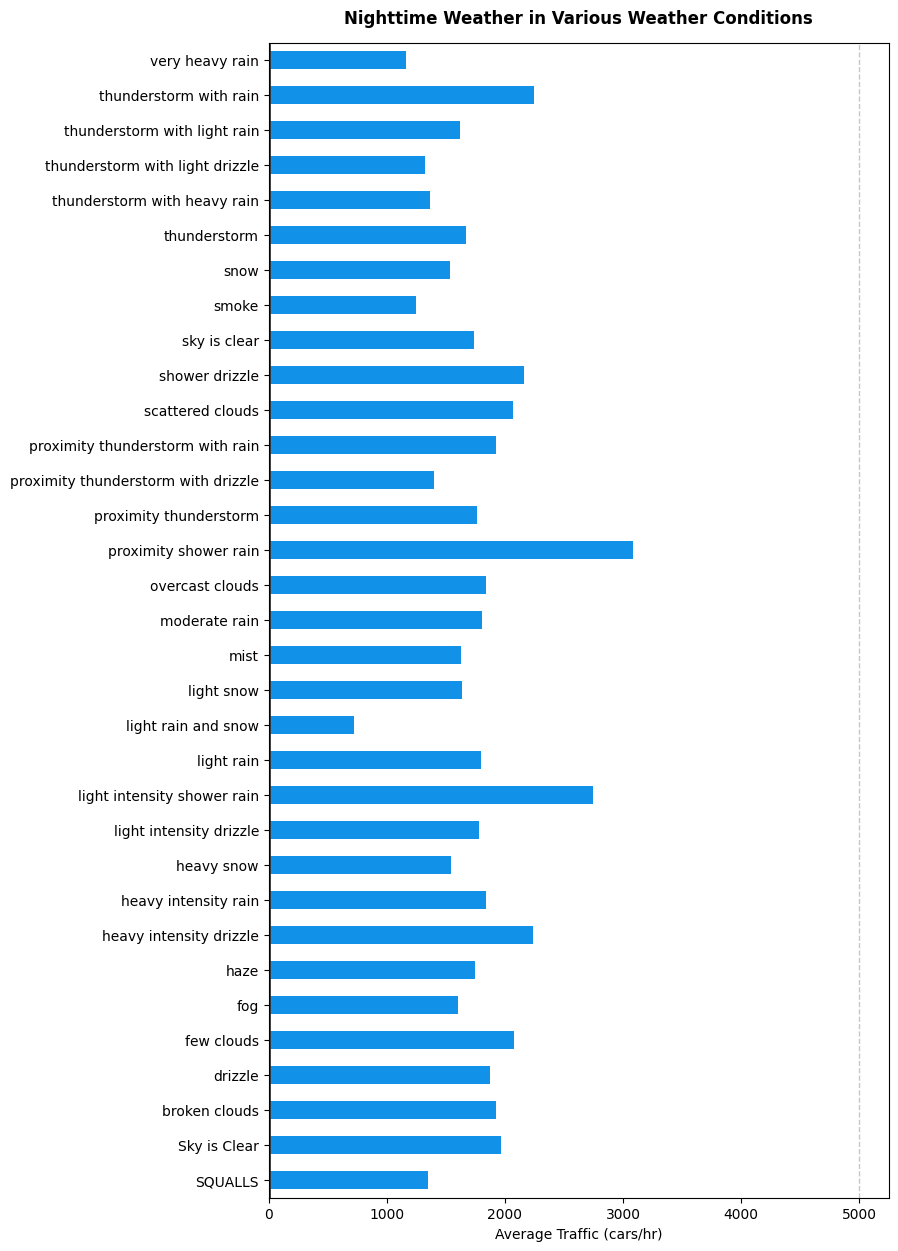

In [40]:
# By night weather description
by_night_weather_description = group_column(df=night, col='weather_description', aggr_col='traffic_volume')

create_barh(df=by_night_weather_description, x_val='weather_description', y_val='traffic_volume',
            label_x='Average Traffic (cars/hr)', title='Nighttime Weather in Various Weather Conditions',
            size=(8,15))
plt.show()

### Observation

- The bar graphs do not show any weather type as a significant indicator of nighttime traffic. Although two weather descriptions (proximity shower rain and light intensity shower rain) show some correlation with increased traffic than the others, the correlation is not significant enought to identify them as heavy traffic indicators.

Finally, let's make sense of all the information we have gleaned through analysis.

## Recommendations for Avoiding Westbond Congestion

With an average of about 3,300 cars, vans, lorries and motorbikes on the westbound road every hour, a certain degree of congestion is simply inescapable.

- Traffic is exacerbated during peak hours (7am and 4pm) from Mondays to Fridays - when commuters are heading to and from work or when parents are driving their kids to school. The key is to be flexible with timing. Our analysis has shown that leaving home anytime between 4am-6am can help reduce the chances of being stuck in the mornings. However, it is advisable to leave home before 6am in the summer months since traffic is generally higher during these periods.
- For those looking to set off to visit family for the weekends, Friday evenings might not be the best time to leave. We have identified more traffic on Friday nights than other nights, and the traffic takes longer to cool off. Saturdays might be a better alternative. Traffic is generally lower during weekends.
- One should travel only when necessary in bad daytime weather. Our analysis shows some correlations between bad weather and traffic volume during the day. The pattern may not be perfectly predictable, but vehicles can get stuck on the road, leading to more traffic.
- Finally, commuters should not be afraid to take less familiar routes. If the westbound road seems overly congested, commuters could consider an alternative way. It may be longer in terms of miles covered, but it might help avoid the worst of the congestion, and on some days, one might arrive at his destination even earlier. Plus, who knows what new adventures the road might bring?

## Conclusion

In this project, we aimed to find a few indicators of heavy traffic on the I-94 Interstate highway (westbound route). We observed that Datetime indicators are more relevant than weather indicators during daytime and nighttime.

- Traffic is heavier is rush hours, 7am and 4pm.
- Traffic is more on business days than weekends.
- Warmer months have more traffic than colder months.
- Friday nights are busier than other nights on average.
- It's hard to tell how weather and traffic intensity relate.

## Prompts for Further Exploration

- Are some public holidays associated with higher traffic volumes than others.